In [ ]:


▶목차


|   Chapter               | details             |
|:-------------------------|:---------------------|
|3-6 |프로젝트: 고양이 수염 스티커 만들기         |
|Step 1 | 스티커 구하기 or 만들기 |
|Step 1-1 | 고양이 수염 이미지를 다운로드 받아주세요       |
|Step 1-2 | 폴더 생성 & 파일 업로드               |
|1-5 |여러분의 셀카 이미지도 촬영                  |
|1-6 |얼굴 검출 & 랜드마크 검출 하기                  |
|1-7 | 수염 스티커 이미지의 표시하기     |
|1-8 |깃허브 주소 업로드                           |

▶딥러닝 순서


  | 딥러닝순서                                             | 상세내용                                       |
|:------------------------------------------------------|:------------------------------------------------|
|1. 데이터 준비       |데이터셋을 구성한다                |
|2. 딥러닝 네트워크 설계   |데이터셋의 다양성, 정규화 등의 시도가 적절하였음|
|3. 학습|학습모델을 사용하여 학습시킨다.                             |
|4. 테스트(평가)| 학습한 내용을 파악하고 예측을 시도해본다|

▶루브릭 평가 기준

    
- 아래의 기준을 바탕으로 프로젝트를 평가합니다.

| 평가문항                                             | 상세기준                                       |
|:------------------------------------------------------|:------------------------------------------------|
|1. 이미지 분류기 모델이 성공적으로 만들어졌는가?      |트레이닝이 정상적으로 수행되었음                |
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?   |데이터셋의 다양성, 정규화 등의 시도가 적절하였음|
|3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?|60% 이상 도달하였음                             |


# 3-6. 프로젝트: 고양이 수염 스티커 만들기
> 오늘의 Exploration_03는 뭐하는 날 일까요?
스티커를 세밀하고 자연스럽게 적용하기 위해서 눈, 코, 입, 귀와 같은 얼굴 각각의 위치를 아는 것이 중요합니다. 이 위치들을 찾아내는 기술을 랜드마크 landmark 또는 조정 alignment 이라고 합니다. 조금 더 큰 범위로는 keypoint detection 이라고 부르고 있습니다. 대부분의 face landmark 데이터셋은 눈, 코, 입과 턱을 포함하고 있습니다. 얼굴의 랜드마크를 찾아냈다면 머리의 위치를 예상하는 것은 쉽습니다. 눈과 코의 위치로부터 위로 떨어져 있는 정도를 데이터로부터 유추할 수 있을 겁니다.

> 정리하자면 위치를 파악하고 위치를 인식하는 것을 하는 거죠
인식한 후 원하는 위치에 또는 센터가 되는 위치에 자신이 원하는 이미지를 화면에 보여지게 하는 것입니다.

>얼굴이 포함된 사진을 준비하고
사진으로부터 얼굴 영역 face landmark 를 찾아냅니다. (landmark를 찾기 위해서는 얼굴의 bounding box를 먼저 찾아야합니다.)
찾아진 영역으로 부터 인중에 수염 스티커를 붙여넣겠습니다.

>우선해야 될 것은 Step1부터 해보도록 하겠습니다.

## Step 1. 스티커 구하기 or 만들기

- (1) 고양이 수염 이미지를 다운로드 받아주세요.
>폴더 생성을 해서 다운로드 받은 이미지를 넣어줍니다.

- (2) 여러분의 셀카 이미지도 촬영해 주세요.

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

- 오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾기


images 디렉토리에 image.png 으로 본인의 셀카 사진을 저장
images 디렉토리에 고양이 수염 스티커 사진도 저장

In [1]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
# 사용할 다양한 패키지 가져오기

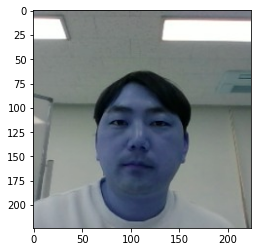

In [3]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

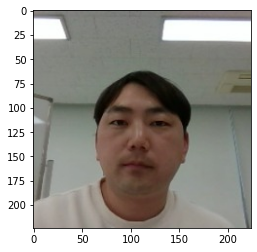

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [5]:
# HOG Detector 선언***
detector_hog = dlib.get_frontal_face_detector() # detector_hog 선언하지 않아서 프로그래밍 작동이 안되었다.

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(66, 96) (155, 186)]]


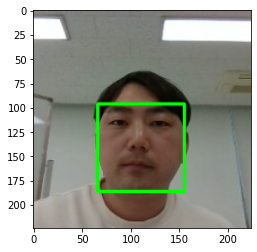

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
# 저장한 landmark 모델을 불러옵니다.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# landmark dectector 불러오기
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
landmark_predictor

In [11]:
# landmark를 저장할 리스트 생성
list_landmarks = []
for dlib_rect in dlib_rects:
    # 얼굴안에서 랜드마크 찾기
    points = landmark_predictor(img_rgb, dlib_rect)
#     print(points.parts()) 
    # tuple형태로 위치값이 들어가 있음
    # 리스트에저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [12]:
# 랜드마크 리스트를 하나씩 받아서
for landmark in list_landmarks:
    # 인덱스와 위치값(tuple형태)을 받아옴
    for idx, point in enumerate(list_points):
        # 받은 이미지를 노랑으로 변환
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

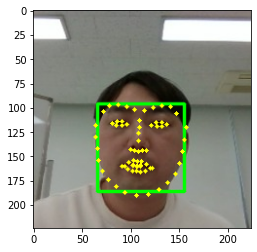

In [13]:
# RGB값으로 변환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지 출력
plt.imshow(img_show_rgb)
plt.show()

In [14]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[33][0]
    y = landmark[33][1]# - dlib_rect.width()//2
    # 얼굴을 인식한 사각형의 크기
    w = dlib_rect.width()
    h = dlib_rect.width()
    print (f'(x,y) : {x,y}')
    print (f'(w,h) : {w,h}')

(108, 134)
(x,y) : (108, 145)
(w,h) : (90, 90)


In [19]:
# 고양이 수염 사진 불러오기 - slack에서 공유받은 사진
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(90, 90, 3)


In [20]:
refined_x = x - img_sticker.shape[1] // 2  # left
refined_y = y + img_sticker.shape[0] // 2  # top
print (f'(x,y) : {refined_x, refined_y}')
if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print (f'(x,y) : {refined_x, refined_y}')

(x,y) : (63, 190)


In [21]:
# refined_y - img_sticker.shape[0]
print(330 - 224)
# refined_x + img_sticker.shape[1]
print(128 + 224)

106
352


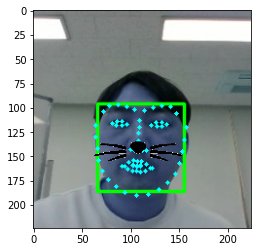

In [22]:
# sticker 영역 구하기
sticker_area = img_show[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]]
# 원래 이미지의 스티커 영역에 스티커 붙히기
img_show[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) # np.where(조건, 맞을때 실행, 아닐때 실행)
# 수염 이미지 확인
plt.imshow(img_show)

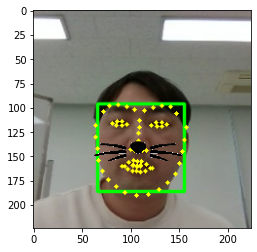

In [25]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

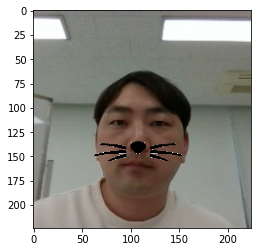

In [23]:
# 출력용 사진에 적용
sticker_area = img_bgr[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 이슈와 회고

### 2가지 이슈
## 1. 스티커의 위치값을 변경하라
현재 y의 값이 기준점 얼굴 윤곽 박스를 반으로 나눈 값을 넣어서 -마이너스로 넣어서 왕관에 위치하게 되어있는데요
현재의 y값은 왕관위치로 되어 있기 때문에 나누기 와 값을 없애고 -마이너스한 걸 +플러스로 변경하면 y의에 값이 밑으로 내려오면서 코의 위치할 수 있다.
## 2. 화이트 배경색을 제거하라
np.where 의 현재 스티커 배경이 0이면(검정색) ,얼굴의(참, 거짓), 스티커(참, 거짓)
np.where 의 현재 스티커 배경이 255이면(하얀색) ,얼굴의(참, 거짓), 스티커(참, 거짓)
np.where의 값을 변경하면 픽셀처럼 작은 단위로 분석을 해서 조건의 맞으면 참, 조건의 맞지 않으면 거짓으로 얼굴이 보여질지 스티커가 보여질 지 달라진다.

스티커의 위치와 배경색의 대한 이해를 해야 했으며
배경 그 위에 겹쳐서 스티커가 자꾸 발생하고 배경이 자꾸 생기고 정말 잘 안되었습니다.
다른 분들 것을 참고하여 적용하여 보니 잘 되네요. 내꺼로 만드려면 아직 시간이 더 필욯한 것 같습니다.





Reference

https://github.com/Development-On-Saturday/AIFFEL_Exploration_Reference/blob/main/exp_03/notebooks/exp03_v1.ipynb